In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importation du dataset avec read csv fonction de pandas
data = pd.read_csv("C:/Users/pierr/OneDrive/Documents/ESILV/A4/S7/Python for Data/PROJET/ObesityDataSet_raw_and_data_sinthetic.csv")

# Affichage des premières lignes du dataset
print(data.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

# 1. Exploratory Data Analysis

## Objectif :

Comprendre du mieux possible nos données. Appréhender la structure de nos données, les liens entre elles. Déterminer des possibles liens entre la viriable target "NObeyesdad" et les autres attributs du dataset

## Checklist des opérations à faire

### Analyse de Forme :

- variable target : NObeyesdad
- lignes et colonnes : 2111 lignes, 17 colonnes
- types de variables : 
    - quantitatives : 8 (float64)
    - qualitatives : 9 (object)
- Analyse des valeurs manquantes : aucune valeur manquante, le dataset est complet. Il n'y aura donc à priori pas d'élagage de données nécessaire pour le moment

### Analyse de Fond :

Visualisation de la target :  
   - Insufficient_Weight   : 272
   - Normal_Weight         : 287
   - Overweight_Level_I    : 290
   - Overweight_Level_II   : 290
   - Obesity_Type_I        : 351
   - Obesity_Type_II       : 297
   - Obesity_Type_III      : 324
  
46% de personne en obésité (972 / 2111)

### Catégorisation des variables :  

*9 variables qualitatives (type object)*

   - 4 variables binaires (yes/no ) : family_history_with_overweight, FAVC, SMOKE,SCC
   - 5 variables qualitative : gender, CAEC, CALC, MTRANS, NObeyesdad (variable target)
   
*8 variables quantitatives (type float64)*

   - 3 variables quantitatives continues (age, height, weight)
   - 5 variables quantitatives également continues qui ne devrait cependant pas l'être : FCVC, FAF, CH2O, NCP, TUE. Ces paramètres sont les réponses aux questions du type : *A quelle fréquence consommez-vous des légumes ? Jamais - Parfois - Régulièrement - Toujours*. Une variable continue n'est pas cohérente ici.

### Signification des variables quantitatives :

   - variables continues non standardisées
   - age : population entre 20 et 40 ans
   - weight : presque 2 groupes <90 kg et >90 kg   
   
   - FCVC, FAF, CH2O, NCP, TUE ne sont pas exploitables dans l'immédiat il semblerait. Elles sont incohérentes aux vues des questions de l'étude. Ce sont des variables continues alors qu'elles devraient être qualitatives. Cela s'explique de la manière suivante : 23% du dataset provient des réponses des personnes et 77% a été généré numériquement via le " Weka tool and the SMOTE filter " ; d'où le fait de trouver des valeurs numériques float au lieu d'entier. Pourquoi ne pas utiliser la fonction *round()* pour afiner ces paramètres et corriger ce problème ?
    
   
### Signification des variables binaires et qualitatives :
    
   - Presque **50%/50%** de femme et d'homme sondés
   - **81%** ont un passif de surpoids dans leur famille
   - **Presque aucun fumeur** (44 / 2111)
   - **88%** ont une alimentation calorique
   - **Peu de monitoring des calories** (96 / 2111)
   - 2/3 consomme de l'alcool "sometimes", 1/3 pas du tout
   - 2 moyens de transport utilisés massivement : 
       - 1/4 voiture
       - 3/4 transports en commun
       
Malgré tout, les types de poids sont pourtant **très répartis** (entre 12.8% et 16.6% pour chacune des 6 catégories)
    
### Relation Variables Quantitatives / Target :
   - **Target/age** : difficile à exploiter clairement. Cependant on remarque tout de même les points suivants :
       - inssufisance pondérale majoritairement chez les <20 ans
       - pic obésité type III à 25 ans
        
   - **Target/poids** : semble être un bon indicateur à lui seul. Hypothèse à tester : introduire la variable IMC 


\begin{align*}
IMC = (Poids/Taille²)
\end{align*} 
 
### Relation Variables Qualitatives / Target :

   - **gender** : pour les femmes et les hommes en forte obésité, les femmes sont presques toutes en niv 3 et les hommes en niv 2. Le sexe semble influer clairement sur ces niveaux d'obésité en particulier
   - family passif : les personnes en surpoids/obésité ont pour la grande majorité un passif familial.
   - **FAVC** (food quality) : beaucoup mangent mal mais pour autant parmi ces personnes, toutes ne développent pas une forme de surpoids/obésité
   - **CAEC** (grignotage) : beaucoup de 'sometines' (la réponse "facile" et logique) avec une majorité de personne en surpoids 
   - **SMOKE** : très peu de fumeur. Intérêt dans cette étude ?
   - **SCC** : très peu de compteur de calories. Intérêt dans cette étude ?
   - **CALC** (alcool) : sometimes -> la catégorie la plus représenté = obésity III. Le nombre de consommateur d'alcool occasionnel semble être lié à la gravité du niveau d'obésité.
   - **MTRA** : la majorité utilisant des transports en commun est homogénéiquement répartie (transport le plus utilisé et pratique). Pour la voiture, c'est aussi le même schéma. Toutefois, aucun Obésité III ne prend la voiture (ce sont également des femmes d'après la relation *gender/target*)
   
### Relation Variables Quantitatives / Variables Quantitatives :

On remarque une relation relativement importante entre les variables de poids et de taille. Cela confirme l'idée que tester le rajout de la variable IMC liant ces deux paramètres est sans doute intéressante pour notre modèle


In [3]:
df = data.copy()

In [4]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Analyse de Forme

In [5]:
print(df.shape)

(2111, 17)


object     9
float64    8
dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


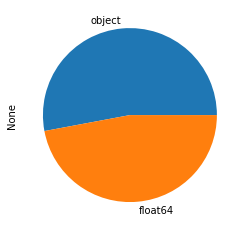

In [6]:
print(df.dtypes.value_counts())
print(df.dtypes.value_counts().plot.pie())

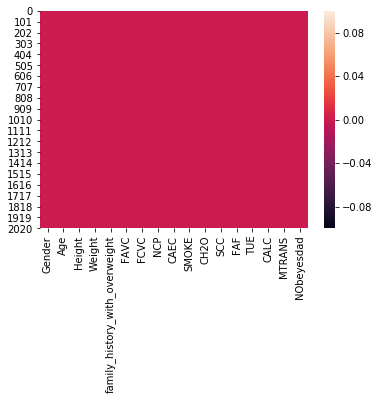

In [7]:
sns.heatmap(df.isna())

In [8]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Analyse de Fond

In [9]:
print(df['NObeyesdad'].value_counts())
print("   ")
print(df['NObeyesdad'].value_counts(normalize=True))

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64
   
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_II    0.137376
Overweight_Level_I     0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: NObeyesdad, dtype: float64


## Catégorisation des Variables

In [10]:
for col in data.select_dtypes('object'):
    print(f'{col:-<40} {data[col].unique()}')

Gender---------------------------------- ['Female' 'Male']
family_history_with_overweight---------- ['yes' 'no']
FAVC------------------------------------ ['no' 'yes']
CAEC------------------------------------ ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE----------------------------------- ['no' 'yes']
SCC------------------------------------- ['no' 'yes']
CALC------------------------------------ ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS---------------------------------- ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad------------------------------ ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [11]:
for col in data.select_dtypes('float64'):
    print(col)

Age
Height
Weight
FCVC
NCP
CH2O
FAF
TUE


## Signification des Variables Quantitatives

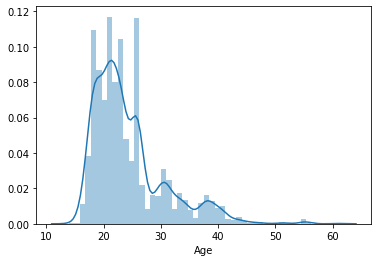

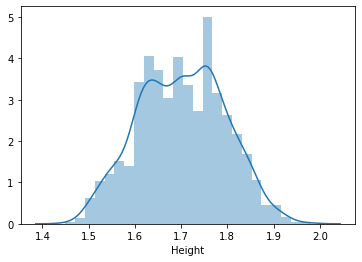

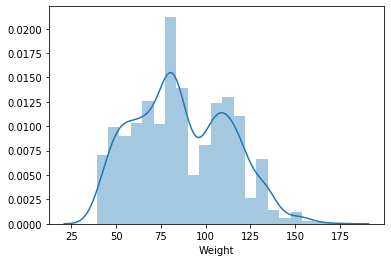

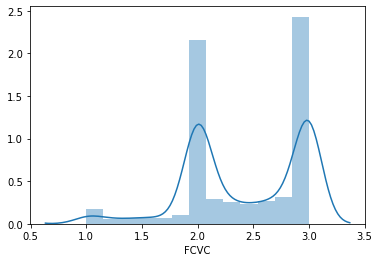

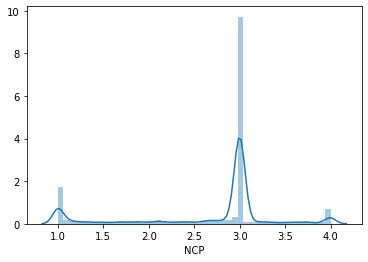

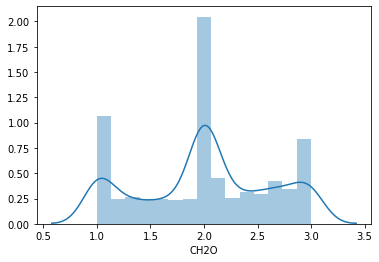

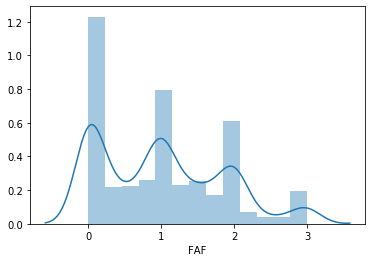

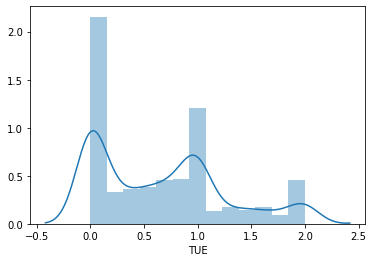

In [12]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

## Signification des Variables Binaires et Qualitatives

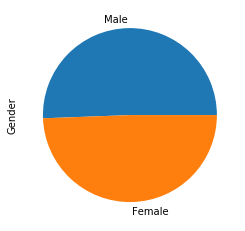

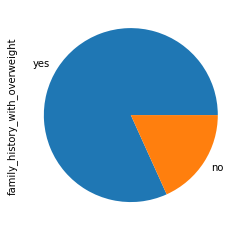

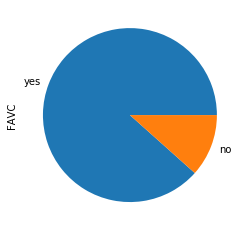

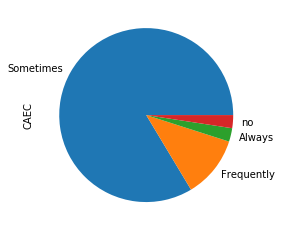

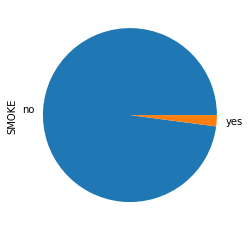

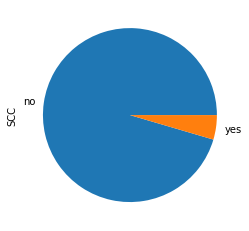

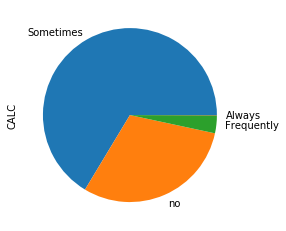

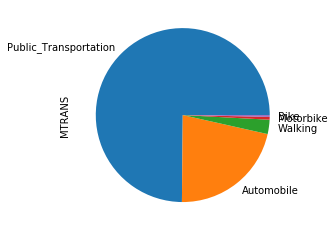

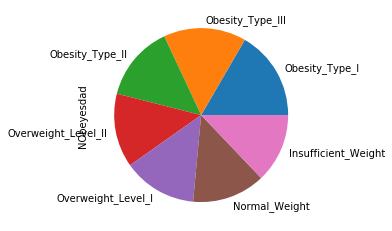

In [13]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

## Relation Variables Quantitatives / Target

In [14]:
#creation de sous ensembles:

df_insuff = df[df['NObeyesdad']== 'Insufficient_Weight']
df_normal = df[df['NObeyesdad']== 'Normal_Weight']
df_overI = df[df['NObeyesdad']== 'Overweight_Level_I']
df_overII = df[df['NObeyesdad']== 'Overweight_Level_II']
df_obesityI = df[df['NObeyesdad']== 'Obesity_Type_I']
df_obesityII = df[df['NObeyesdad']== 'Obesity_Type_II']
df_obesityIII = df[df['NObeyesdad']== 'Obesity_Type_III']

C:\Users\pierr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pierr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


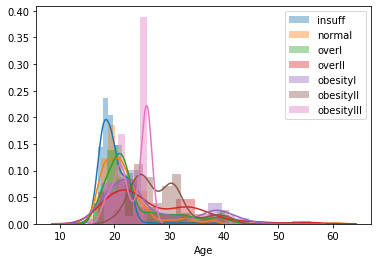

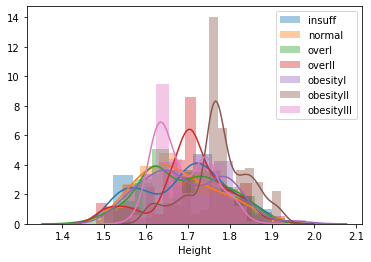

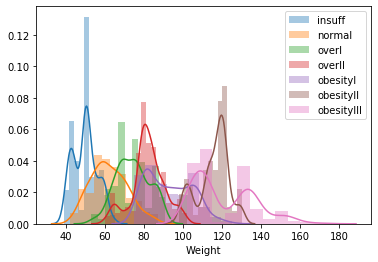

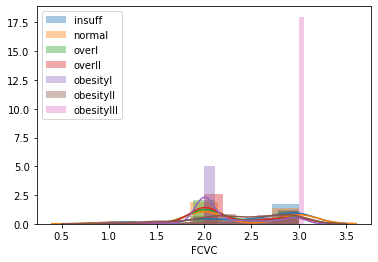

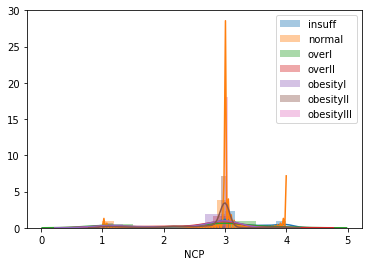

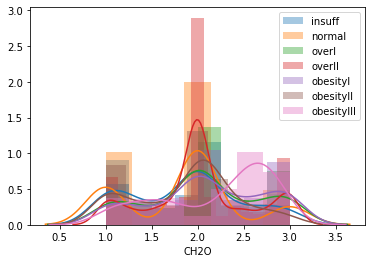

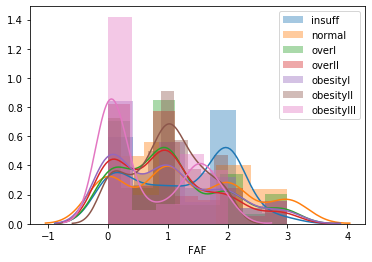

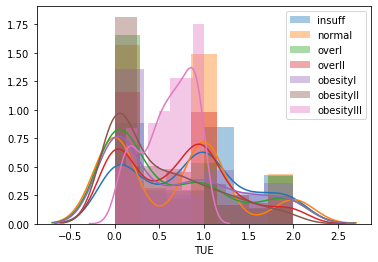

In [15]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_insuff[col], label = 'insuff')
    sns.distplot(df_normal[col], label = 'normal')
    sns.distplot(df_overI[col], label = 'overI')
    sns.distplot(df_overII[col], label = 'overII')
    sns.distplot(df_obesityI[col], label = 'obesityI')
    sns.distplot(df_obesityII[col], label = 'obesityII')
    sns.distplot(df_obesityIII[col], label = 'obesityIII')
    plt.legend()

## Relation Variables Qualitatives / Target

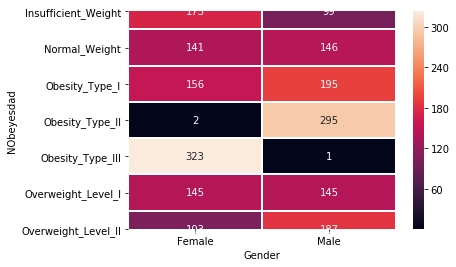

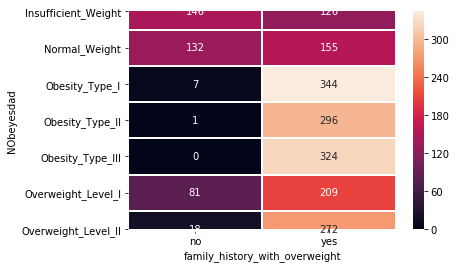

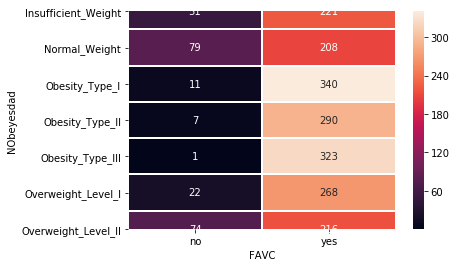

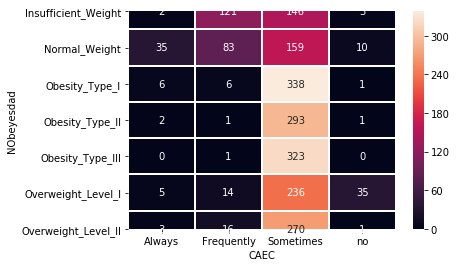

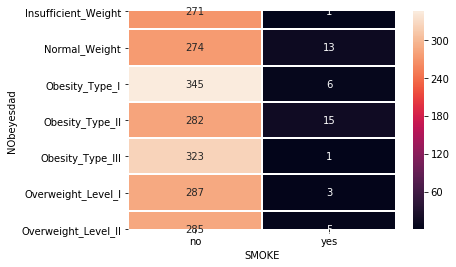

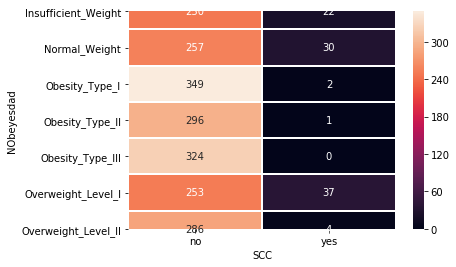

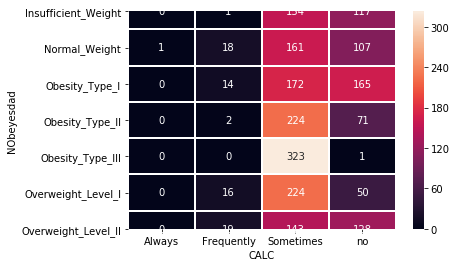

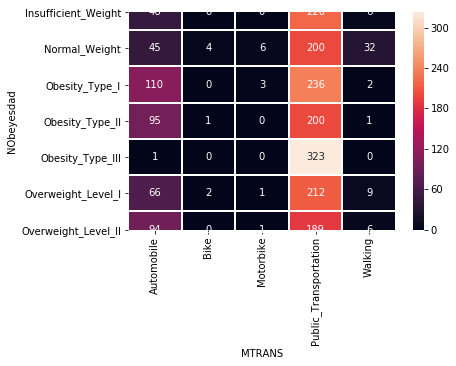

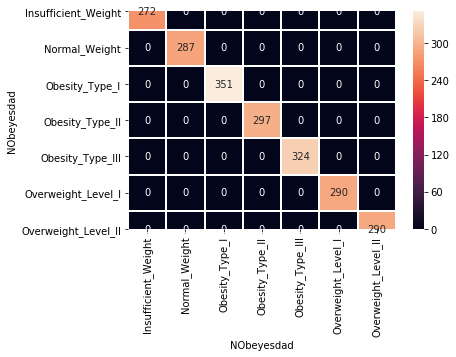

In [16]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(data['NObeyesdad'],df[col]),annot = True, fmt='d', linewidths=1) 

## Relation Variables Quantitatives / Variables Quantitatives

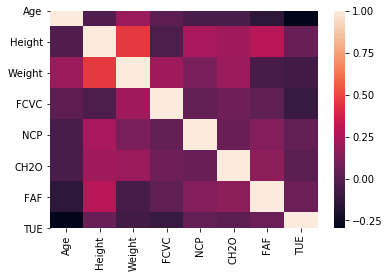

In [17]:
sns.heatmap(data.corr())

In [18]:
data.corr()['Weight'].sort_values()

#Height                            0.463136

TUE      -0.071561
FAF      -0.051436
NCP       0.107469
CH2O      0.200575
Age       0.202560
FCVC      0.216125
Height    0.463136
Weight    1.000000
Name: Weight, dtype: float64

# 2. Pré-Traitement des données

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
def split(df):
    trainset, testset = train_test_split(df, test_size=0.3, random_state=0)
    return trainset,testset

In [21]:
def encodage(df):
    code = {'yes':1,
            'no':0,
            'Female':1,
            'Male':0,
            'Sometimes':1,
            'Frequently':2,
            'Always':3,
            'Automobile':1,
            'Motorbike':2,
            'Bike':3, 
            'Public_Transportation':4,
            'Walking':5, 
            'Insufficient_Weight':0,
            'Normal_Weight':1 ,
            'Overweight_Level_I':2 ,
            'Overweight_Level_II':3,
            'Obesity_Type_I':4,            
            'Obesity_Type_II':5,
            'Obesity_Type_III':6
           }

    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
    
    return df

In [22]:
def preprocessing(df):
    
    df = encodage(df)
    
    X = df.drop('NObeyesdad',axis = 1)
    Y = df['NObeyesdad']
    
    return X, Y

In [23]:
def GetReadyForML (df):
        
    trainset, testset = split (df)
    X_train, Y_train = preprocessing(trainset)
    X_test, Y_test = preprocessing(testset)
    
    return X_train, Y_train, X_test, Y_test

In [24]:
X_train, Y_train, X_test, Y_test = GetReadyForML(df)

C:\Users\pierr\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# 3. Modélisation - 1ère Partie

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
decisiontree_model = DecisionTreeClassifier(random_state=0)

# 4. Evaluation du modèle

In [27]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report,make_scorer
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

In [28]:
def evaluation(model):
    
    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)
    model_acc = accuracy_score(Y_test, ypred)
    
    print(confusion_matrix(Y_test, ypred))
    print()   
    print(classification_report(Y_test, ypred))
    print()
    print('Accuracy : ' + str(model_acc))
    return(model_acc)

In [29]:
evaluation(decisiontree_model)

[[ 86   4   0   0   0   0   0]
 [  8  74   5   0   0   0   0]
 [  0   8  69   4   0   0   0]
 [  0   1   4  73   4   0   0]
 [  0   0   0   0 101   2   0]
 [  0   0   0   1   1  88   0]
 [  0   0   0   0   0   0 101]]

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        90
           1       0.85      0.85      0.85        87
           2       0.88      0.85      0.87        81
           3       0.94      0.89      0.91        82
           4       0.95      0.98      0.97       103
           5       0.98      0.98      0.98        90
           6       1.00      1.00      1.00       101

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634


Accuracy : 0.9337539432176656


0.9337539432176656

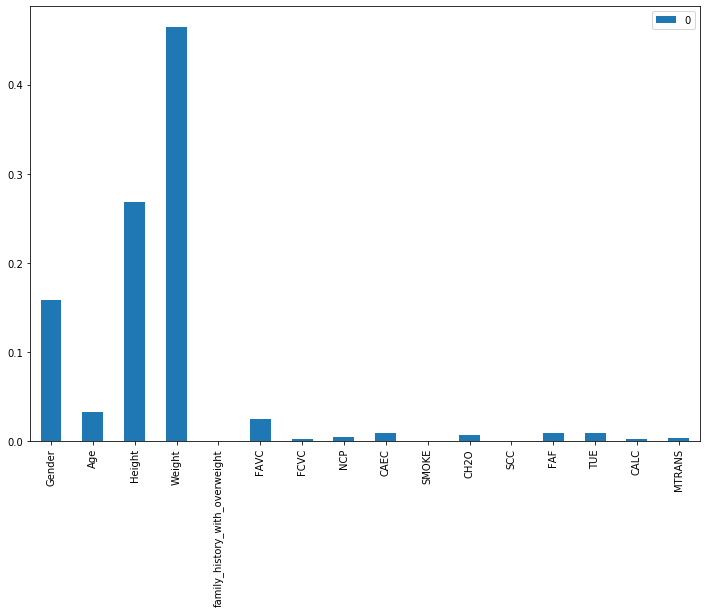

In [30]:
pd.DataFrame(decisiontree_model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

# 5. Amélioration du modèle

## 1. Arrondir les variables anormalement continues (FCVC,NCP,FAF,CH2O,TUE)

Arrondir les données ne change pas grand chose aux résultats, il est difficile de dire si on gagne ou perd de la précision. Dans la suite de nos tests, nous n'avons plus effectué cette modification sur notre dataset df. Toutefois, comme le montre le précédent plot, ces données n'ont en réalité pas beaucoup de poids dans notre modèle.

## 2. Ajouter la variable IMC

L'IMC est un indice de mesure qui permet de déterminer avec fiabilité la catégorie pondérale dans laquelle se situe une personne. Il est calculé à partir du poids et de la taille comme suit :

\begin{align*}
IMC = (Poids/Taille²)
\end{align*} 

Bien que les résultats et la précision du précédent modèle étaient déjà élevés, on constate que le nouveau paramètre de notre dataset IMC, améliore encore significativement les résultats. On approche une précision, un recall et un score f1 tous égaux à 1.

Lorsqu'on regarde à nouveaux le poids des paramètres, on remarque que l'IMC a largement pris le dessus sur tous les autres.

Essayons maintenant de supprimer les autres variables ayant un poids très faible.

## 3. Eliminer les variables de poids faible dans le modèle

Après différents test, supprimer des paramètres ayant un poids très faible (voir quasi nul) pour notre modèle n'améliore pas les résultats. On perd légèrement en précision.

## 0. Reprendre avec un df sans modification

In [31]:
df = data.copy()

## 1. Arrondir les variables anormalement continues (FCVC,NCP,FAF,CH2O,TUE)

In [32]:
df['FCVC'] = df['FCVC'].round()
df['NCP'] = df['NCP'].round()
df['FAF'] = df['FAF'].round()
df['CH2O'] = df['CH2O'].round()
df['TUE'] = df['TUE'].round()

In [33]:
X_train, Y_train, X_test, Y_test = GetReadyForML(df)

C:\Users\pierr\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
evaluation(decisiontree_model)

[[ 86   4   0   0   0   0   0]
 [  7  73   7   0   0   0   0]
 [  0   8  69   4   0   0   0]
 [  0   1   2  76   3   0   0]
 [  0   0   0   2  98   3   0]
 [  0   0   0   0   2  88   0]
 [  0   0   0   0   0   0 101]]

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        90
           1       0.85      0.84      0.84        87
           2       0.88      0.85      0.87        81
           3       0.93      0.93      0.93        82
           4       0.95      0.95      0.95       103
           5       0.97      0.98      0.97        90
           6       1.00      1.00      1.00       101

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634


Accuracy : 0.9321766561514195


0.9321766561514195

#### The previous accuracy was 0.9337539432176656, there is no real difference with or without a round on those values

## 2. Ajouter la variable IMC

In [35]:
IMC = df["Weight"]/((df["Height"])**2)
df.insert(loc = 4, column='IMC', value=IMC)

In [36]:
X_train, Y_train, X_test, Y_test = GetReadyForML(df)

C:\Users\pierr\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [37]:
evaluation(decisiontree_model)

[[ 88   2   0   0   0   0   0]
 [  1  84   2   0   0   0   0]
 [  0   4  75   2   0   0   0]
 [  0   0   2  79   1   0   0]
 [  0   0   0   0 101   2   0]
 [  0   0   0   0   4  86   0]
 [  0   0   0   0   0   0 101]]

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.93      0.97      0.95        87
           2       0.95      0.93      0.94        81
           3       0.98      0.96      0.97        82
           4       0.95      0.98      0.97       103
           5       0.98      0.96      0.97        90
           6       1.00      1.00      1.00       101

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634


Accuracy : 0.9684542586750788


0.9684542586750788

#### The results are realy good, we are close to 0.98 of accuracy !

## 3. Eliminer les variables de poids faible dans le modèle

In [38]:
df = df.drop('Age',axis = 1)
df = df.drop('FAVC',axis = 1)
df = df.drop('FCVC',axis = 1)
df = df.drop('NCP',axis = 1)
df = df.drop('CAEC',axis = 1)
df = df.drop('SMOKE',axis = 1)
df = df.drop('CH2O',axis = 1)
df = df.drop('SCC',axis = 1)
df = df.drop('FAF',axis = 1)
df = df.drop('TUE',axis = 1)
df = df.drop('CALC',axis = 1)
df = df.drop('MTRANS',axis = 1)
df = df.drop('family_history_with_overweight',axis = 1)

In [39]:
X_train, Y_train, X_test, Y_test = GetReadyForML(df)

C:\Users\pierr\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [40]:
evaluation(decisiontree_model)

[[ 88   2   0   0   0   0   0]
 [  1  85   1   0   0   0   0]
 [  0   4  74   3   0   0   0]
 [  0   0   3  79   0   0   0]
 [  0   0   0   0 101   2   0]
 [  0   0   0   0   3  87   0]
 [  0   0   0   0   0   0 101]]

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.93      0.98      0.96        87
           2       0.95      0.91      0.93        81
           3       0.96      0.96      0.96        82
           4       0.97      0.98      0.98       103
           5       0.98      0.97      0.97        90
           6       1.00      1.00      1.00       101

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634


Accuracy : 0.9700315457413249


0.9700315457413249

#### Les résultats ne sont pas mieux cette fois-ci. Supprimer tous les paramètres de poids faible ne semble donc pas être une bonne idée.

# 6. En résumé

Après une étude approfondie de la base de données, des variables et des relations entre elles, nous sommes parvenus à créer un modèle fiable en utilisant un arbre de décision. Ce qui a également permis d'augmenter la précision de nos résultats a été l'ajout de la variable IMC comme le montre le montre le dernier graphe ci-dessous qui affiche la relation entre IMC et les différentes catégories de poids.

In [41]:
df_insuff = df[df['NObeyesdad']== 'Insufficient_Weight']
df_normal = df[df['NObeyesdad']== 'Normal_Weight']
df_overI = df[df['NObeyesdad']== 'Overweight_Level_I']
df_overII = df[df['NObeyesdad']== 'Overweight_Level_II']
df_obesityI = df[df['NObeyesdad']== 'Obesity_Type_I']
df_obesityII = df[df['NObeyesdad']== 'Obesity_Type_II']
df_obesityIII = df[df['NObeyesdad']== 'Obesity_Type_III']

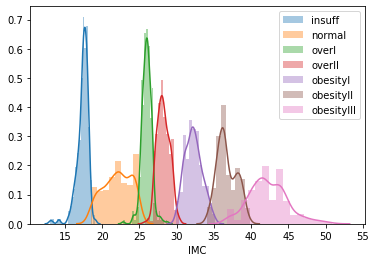

In [42]:
plt.figure()
sns.distplot(df_insuff['IMC'], label = 'insuff')
sns.distplot(df_normal['IMC'], label = 'normal')
sns.distplot(df_overI['IMC'], label = 'overI')
sns.distplot(df_overII['IMC'], label = 'overII')
sns.distplot(df_obesityI['IMC'], label = 'obesityI')
sns.distplot(df_obesityII['IMC'], label = 'obesityII')
sns.distplot(df_obesityIII['IMC'], label = 'obesityIII')
plt.legend()

# 7. Que faut-il comprendre ?

Dans cette première approche de notre dataset, nous n'avons utilisé qu'un seul modèle de prédiction simple pour le moment. La raison est que ce dernier a immédiatement donné des résultats très satisfaisants, et surtout, le plus important à analyser ici n'est pas cela. Avec la variable IMC, nous avons mis en évidence une relation trop forte entre les variables poids et taille, et la variable d'intérêt NObeyesdad.

En effet, il est très probable que cette dernière ait déjà été calculée via un modèle similaire. Or l'objectif de l'étude est de comprendre comment le mode de vie et les habitudes alimentaires / physiques impactent la santé des personnes.

Dans la suite de notre étude nous allons donc retirer les paramètres physiques qui sont le poids et la taille pour mieux comprendre les enjeux des autres paramètres.

# 8. Pour aller plus loin

Au final, étudier la catégorisation de poids des individus en se basant sur des critères physiques, est-ce réellement de but de l'étude ? Certes nous sommes capables de dire avec quasi certitude à quelle catégorie de poids appartient chaque individu de la base de donnée ; Pourtant, nous utilisons des caractéristiques physiques qui ont elles-mêmes déjà été probablement utilisées pour obtenir de résultat de catégorisation, sans se préoccuper des habitudes alimentaires, de l'hygiène de vie ou bien de la pratique sportive des personnes.


L'objectif, plus difficile à atteindre, est ici de comprendre si les habitudes de vie ont une influence réelle sur notre poids afin d'obtenir un modèle prédictif pour mieux comprendre les enjeux de l'obésité.

L'analyse et le travail effectué sur le dataset dans les parties 1 et 2 restent en grande partie toujours valides. Nous allons donc reprendre un dataset vierge, supprimer les paramètres évoqués plus tôt et travail sur les modèles de machine learning à adopter

In [43]:
df = data.copy()

df = df.drop('Weight',axis = 1)
df = df.drop('Height',axis = 1)

X_train, Y_train, X_test, Y_test = GetReadyForML(df)

C:\Users\pierr\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# 8. Modélisation - 2ème Partie

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Decision Tree Model

In [45]:
decisiontree_model = DecisionTreeClassifier(random_state=0)

#### AdaBoost Model

In [46]:
adaboost_model = AdaBoostClassifier(random_state=0)

#### Knn Model

In [47]:
knn_model = KNeighborsClassifier()

#### Boosting Model

In [48]:
boosting_model = GradientBoostingClassifier()

In [49]:
dict_of_models = {'DECISION TREE': decisiontree_model,
                  'ADABOOST': adaboost_model,
                  'KNN': knn_model,
                  'BOOSTING': boosting_model,
                 }

In [50]:
models_acc =[]
for name, model in dict_of_models.items():
    print(name)
    models_acc.append(evaluation(model))
    print("--------------------")

DECISION TREE
[[ 66  10   2   3   8   1   0]
 [ 10  45  15   6   6   4   1]
 [  8  11  40   9  10   2   1]
 [  1  11   4  55   6   5   0]
 [  5   4   8  11  69   6   0]
 [  0   0   1   5   4  78   2]
 [  0   0   0   0   0   0 101]]

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        90
           1       0.56      0.52      0.54        87
           2       0.57      0.49      0.53        81
           3       0.62      0.67      0.64        82
           4       0.67      0.67      0.67       103
           5       0.81      0.87      0.84        90
           6       0.96      1.00      0.98       101

    accuracy                           0.72       634
   macro avg       0.70      0.71      0.70       634
weighted avg       0.71      0.72      0.71       634


Accuracy : 0.7160883280757098
--------------------
ADABOOST
[[ 17   3   7  61   1   1   0]
 [  9  20  13  37   6   2   0]
 [ 10   2  18  25  16   9   1]
 [  2   6   7  3

In [51]:
models_labels = ["DECISION TREE","ADABOOST","KNN","BOOSTING"]

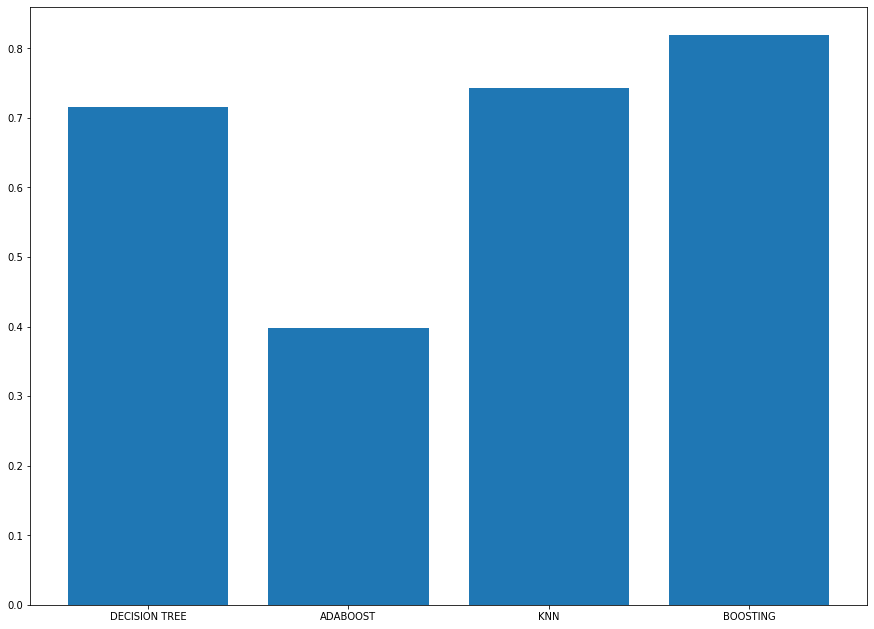

In [52]:
f = plt.figure(figsize=(15, 11))
plt.bar(models_labels,models_acc)
plt.show()

#### A partir de notre dataset sans le poids et la taille on retrouve une accuracy de **0.82** avec un **boosting model** !

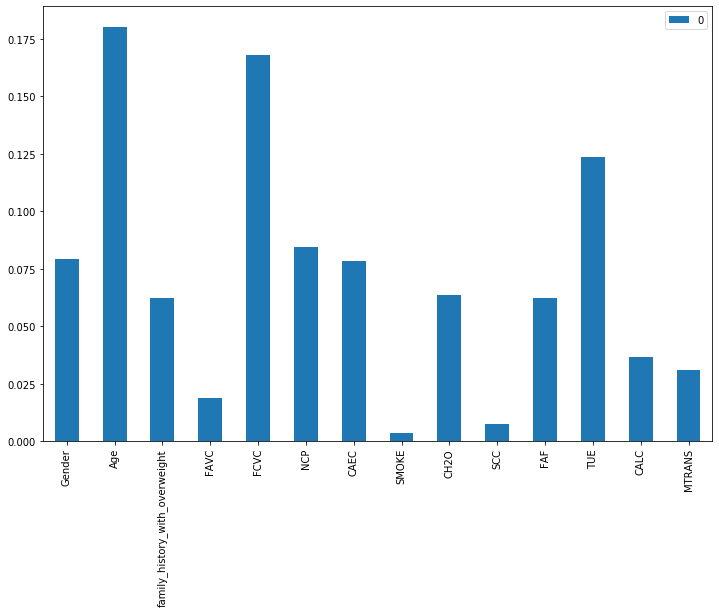

In [53]:
pd.DataFrame(boosting_model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

## 8.1 Arrondir les variables anormalement continues (FCVC,NCP,FAF,CH2O,TUE)

In [54]:
df = data.copy()
df = df.drop('Weight',axis = 1)
df = df.drop('Height',axis = 1)

In [55]:
df['FCVC'] = df['FCVC'].round()
df['NCP'] = df['NCP'].round()
df['FAF'] = df['FAF'].round()
df['CH2O'] = df['CH2O'].round()
df['TUE'] = df['TUE'].round()

X_train, Y_train, X_test, Y_test = GetReadyForML(df)

C:\Users\pierr\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [56]:
evaluation(boosting_model)

[[ 77   8   1   0   4   0   0]
 [ 10  54   8   6   6   2   1]
 [  4   9  51   4  10   2   1]
 [  3   7   4  45  11  11   1]
 [  2   5  11   8  70   5   2]
 [  0   0   0   4   2  84   0]
 [  0   0   0   0   0   0 101]]

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        90
           1       0.65      0.62      0.64        87
           2       0.68      0.63      0.65        81
           3       0.67      0.55      0.60        82
           4       0.68      0.68      0.68       103
           5       0.81      0.93      0.87        90
           6       0.95      1.00      0.98       101

    accuracy                           0.76       634
   macro avg       0.75      0.75      0.75       634
weighted avg       0.75      0.76      0.76       634


Accuracy : 0.7602523659305994


0.7602523659305994

## 8.2 Eliminer les variables de poids faible dans le modèle

In [57]:
df = data.copy()
df = df.drop('Weight',axis = 1)
df = df.drop('Height',axis = 1)

In [58]:
df = df.drop('FAVC',axis = 1)
df = df.drop('SCC',axis = 1)
df = df.drop('SMOKE',axis = 1)

X_train, Y_train, X_test, Y_test = GetReadyForML(df)

C:\Users\pierr\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [59]:
evaluation(boosting_model)

[[ 77   8   4   0   1   0   0]
 [  5  67   8   1   5   1   0]
 [  5  11  49   5   8   1   2]
 [  2  11   2  46  14   7   0]
 [  3   7   5   7  75   5   1]
 [  0   0   0   2   0  88   0]
 [  0   0   0   0   0   0 101]]

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        90
           1       0.64      0.77      0.70        87
           2       0.72      0.60      0.66        81
           3       0.75      0.56      0.64        82
           4       0.73      0.73      0.73       103
           5       0.86      0.98      0.92        90
           6       0.97      1.00      0.99       101

    accuracy                           0.79       634
   macro avg       0.79      0.79      0.78       634
weighted avg       0.79      0.79      0.79       634


Accuracy : 0.7933753943217665


0.7933753943217665

#### Dans les deux cas, l'accuracy est plus faible que 0.82. Ce ne sont donc pas de bonnes options. Essayons maintenant de paramétrer ntore modèle boosting.

# 9 Tunning hyperparameters

In [60]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [61]:
GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
hyper_params = {'max_depth':[ 3, 4, 5,],
                'n_estimators': [100,500,1000,1500,2000], 
                'learning_rate': [0.01,0.05,0.1,0.5]
               }

scorer = make_scorer(f1_score, average = 'weighted')

In [63]:
df = data.copy()
df = df.drop('Weight',axis = 1)
df = df.drop('Height',axis = 1)
X_train, Y_train, X_test, Y_test = GetReadyForML(df)

C:\Users\pierr\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [64]:
#grid = RandomizedSearchCV(GradientBoostingClassifier(), hyper_params, scoring=scorer, cv=4, n_iter=5)

In [65]:
#grid.fit(X_train, Y_train)

In [66]:
#print(grid.best_params_)

#Y_pred = grid.predict(X_test)

#print(classification_report(Y_test, Y_pred))

{'n_estimators': 500, 'max_depth': 5} 0.81

{'n_estimators': 1000, 'max_depth': 5} 0.82

{'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.5} 0.82

{'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1} 0.83

{'n_estimators': 1500, 'max_depth': 5, 'learning_rate': 0.05} 0.83

Après plusieurs RandomGridSearchCV, c'est avec les paramètres suivants qu'on obtient les meilleurs résultats :
- n_estimators : 1500
- max_depth : 5
- learning_rate : 0.05




# 10. Boosting Model Tunned

In [67]:
boosting_model_tunned = GradientBoostingClassifier(n_estimators = 1500,
                                                   max_depth = 5,
                                                   learning_rate = 0.05,
                                                   random_state = 0)

In [68]:
evaluation(boosting_model_tunned)

[[ 78   8   0   2   2   0   0]
 [  5  64  10   4   3   1   0]
 [  3   8  60   2   6   1   1]
 [  0   9   2  58   8   5   0]
 [  1   7   3   6  83   3   0]
 [  0   0   0   2   0  88   0]
 [  0   0   0   0   0   0 101]]

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        90
           1       0.67      0.74      0.70        87
           2       0.80      0.74      0.77        81
           3       0.78      0.71      0.74        82
           4       0.81      0.81      0.81       103
           5       0.90      0.98      0.94        90
           6       0.99      1.00      1.00       101

    accuracy                           0.84       634
   macro avg       0.84      0.83      0.83       634
weighted avg       0.84      0.84      0.84       634


Accuracy : 0.8391167192429022


0.8391167192429022

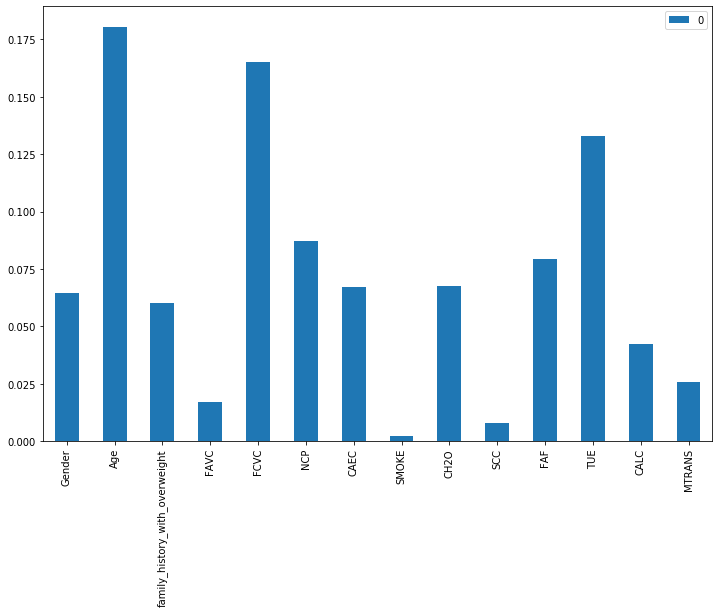

In [69]:
pd.DataFrame(boosting_model_tunned.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

#### Here is our best result : 0.839 !